In [2]:
import numpy as np
import pandas as pd
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
import matplotlib.pyplot as plt

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
def draw_polygon(polygon):
    %matplotlib inline
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    %matplotlib inline
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['orange']
    color_regular=['purple']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):
    %matplotlib inline
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Interaktywna funkcja do wprowadzania własnych wielokątów

In [21]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.widgets import PolygonSelector

polygon = []

def on_select(verts):
    polygon.clear()
    polygon.extend([list(v) for v in verts])

fig, ax = plt.subplots()
polygon_selector = PolygonSelector(ax, on_select)

plt.show(block=True)

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

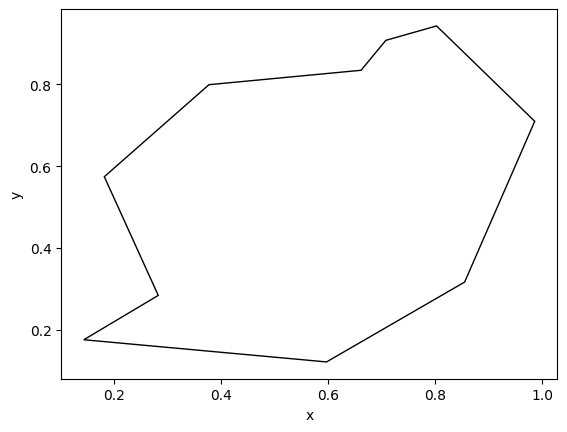

In [31]:
przykladowy_polygon = [[[np.float64(0.3770161290322581), np.float64(0.7987012987012988)], [np.float64(0.18145161290322578), np.float64(0.5741341991341992)], [np.float64(0.282258064516129), np.float64(0.2846320346320347)], [np.float64(0.1431451612903226), np.float64(0.17640692640692643)], [np.float64(0.5967741935483871), np.float64(0.12229437229437232)], [np.float64(0.8548387096774194), np.float64(0.3170995670995671)], [np.float64(0.9858870967741936), np.float64(0.7094155844155845)], [np.float64(0.8024193548387096), np.float64(0.9420995670995672)], [np.float64(0.7076612903225806), np.float64(0.906926406926407)], [np.float64(0.6612903225806451), np.float64(0.833874458874459)]]]
draw_polygon(przykladowy_polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

Funkcja sprawdzająca czy wielokąt jest y-monotoniczny

In [11]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false, jeśli nie jest
    """
    n=len(polygon)
    minWierzcholek = polygon.index(min(polygon, key = lambda x: x[1])) # najnizszy i najwyzszy wierzcholek
    maxWierzcholek = polygon.index(max(polygon, key = lambda x: x[1]))
    Lewo=[]
    Prawo=[] # wierzcholki po lewej i prawej
    if minWierzcholek < maxWierzcholek: # ustawienie wszystkich lewych/prawych obok siebie
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, minWierzcholek - 1, -1)]
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, n)] + [(polygon[i], i) for i in range(minWierzcholek)]
    else:
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, minWierzcholek)]
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, -1, -1)] + [(polygon[i], i) for i in range(n - 1, minWierzcholek - 1, -1)]
    if all(Lewo[i][0][1] >= Lewo[i+1][0][1] for i in range(len(Lewo)-1)) and all(Prawo[i][0][1] >= Prawo[i+1][0][1] for i in range(len(Prawo)-1)):
        return True # czy wszystkie sa monotonicznie
    return False

Testy dla funckji is_y_monotonic

In [ ]:
Test().runtest(1, is_y_monotonic) # passed

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

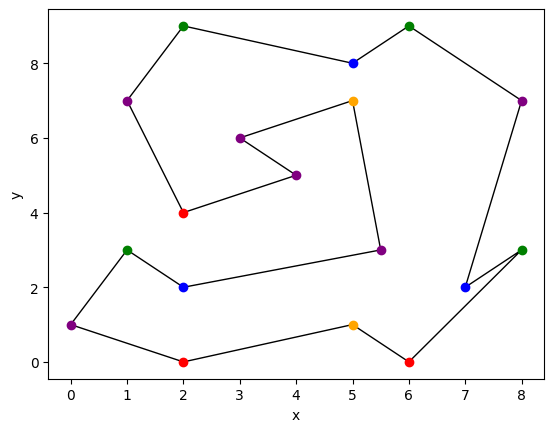

In [24]:
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
draw_polygon_colors(polygon_example_2,polygon_example_colors)

Funckja dzieląca wierzchołki na kategorie

In [26]:
def kolory_wierzcholkow(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def orient(a,b,c): # orientacja
        return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]
    n=len(polygon)
    Numery=[None for _ in range(n)]
    for i in range(n):
        poprzedni = polygon[i-1]
        nastepny = polygon[(i+1)%n]
        aktualny = polygon[i]
        orientacja = orient(poprzedni,aktualny,nastepny)
        if orientacja > 0:
            if poprzedni[1]<aktualny[1] and nastepny[1]<aktualny[1]:
                Numery[i] = 3
            elif poprzedni[1]>aktualny[1] and nastepny[1]>aktualny[1]:
                Numery[i] = 2
            else: Numery[i] = 4
        else:
            if poprzedni[1]<aktualny[1] and nastepny[1]<aktualny[1]:
                Numery[i] = 0
            elif poprzedni[1]>aktualny[1] and nastepny[1]>aktualny[1]:
                Numery[i] = 1
            else: Numery[i] = 4
    return Numery
 

Testy dla funkcji kolory_wierzcholkow

In [ ]:
Test().runtest(2, kolory_wierzcholkow) # Passed

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

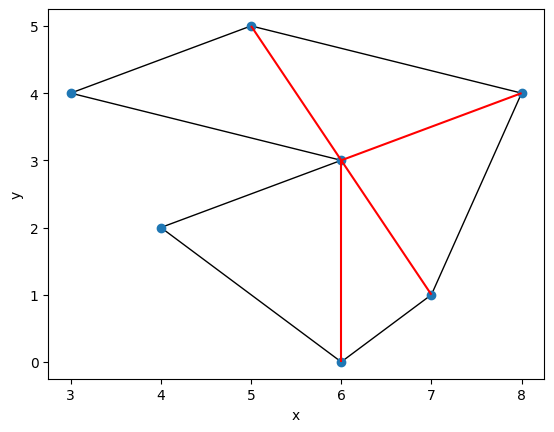

In [ ]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]), (polygon_example_1[2], polygon_example_1[5]), (polygon_example_1[2], polygon_example_1[6]), (polygon_example_1[2], polygon_example_1[4])]
draw_polygon_tri(polygon_example_1, polygon_example_tri)

Funkcja wykonująca triangulacje wielokąta

In [104]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego zgodnie z algorytmem opisanym na wykładzie. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej,
    podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych, np: [(1,5),(2,3)] oznacza, że 
    triangulacja polega na dodaniu przekątnych pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n=len(polygon)
    minWierzcholek = polygon.index(min(polygon, key = lambda x: x[1])) # najnizszy i najwyzszy wierzcholek
    maxWierzcholek = polygon.index(max(polygon, key = lambda x: x[1]))
    Lewo=[]
    Prawo=[] # wierzcholki po lewej i prawej
    if minWierzcholek < maxWierzcholek: # ustawienie wszystkich lewych/prawych obok siebie
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, minWierzcholek - 1, -1)]
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, n)] + [(polygon[i], i) for i in range(minWierzcholek)]
    else:
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, minWierzcholek)]
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, -1, -1)] + [(polygon[i], i) for i in range(n - 1, minWierzcholek - 1, -1)]
        
    ciag_monotoniczny=[None]*n # tworzymy ciag monotoniczny
    l=len(Lewo)
    r=len(Prawo)
    i=j=0
    while i < l or j < r: # łączenie w jeden ciąg monotoniczny
        if j >= r or (i < l and Lewo[i][0][1] > Prawo[j][0][1]):
            ciag_monotoniczny[i + j] = (Lewo[i][0], Lewo[i][1], 'lewo')
            i += 1
        else:
            ciag_monotoniczny[i + j] = (Prawo[j][0], Prawo[j][1], 'prawo')
            j += 1

    def correct_triangle(stack_point_one,stack_point_two,obecny_point,n): # czy trojkat jest gitem
        def orient(a,b,c): # orientacja
            return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]
        if abs(obecny_point[1]-stack_point_one[1]) in (1,n-1): return False
        if obecny_point[2]=='prawo':
            return orient(obecny_point[0],stack_point_two[0],stack_point_one[0])<0
        else:
            return orient(stack_point_one[0],stack_point_two[0],obecny_point[0])<0

    stos=[ciag_monotoniczny[0],ciag_monotoniczny[1]]
    ciag_monotoniczny = ciag_monotoniczny[2:]
    przekatne=[]
    for _ in range(n-2):
        if ciag_monotoniczny[0][2]!=stos[-1][2]: # zmiana strony
            for i in range(len(stos)-1,-1,-1):
                if abs(ciag_monotoniczny[0][1]-stos[i][1]) not in (1,n-1): # nie sasiedzi
                    #przekatne.append((ciag_monotoniczny[0][1],stos[i][1]))
                    przekatne.append([ciag_monotoniczny[0][1],stos[i][1]])
            stos = [stos[-1]] # reset
        else:
            for i in range(len(stos)-2, -1, -1):
                if correct_triangle(stos[i],stos[-1],ciag_monotoniczny[0],n): # czy da sie 
                    #przekatne.append((ciag_monotoniczny[0][1],stos[i][1]))
                    przekatne.append([ciag_monotoniczny[0][1],stos[i][1]]) # tworzymy przekątną
                    stos.pop()
        stos.append(ciag_monotoniczny[0])
        ciag_monotoniczny = ciag_monotoniczny[1:]
    return przekatne

Funkcja zwracająca strukturę końcową tzn. zwraca tablicę zawierającą listy zawierające współrzedne trójkątów wchodzących w skład straingulowanej struktury

In [117]:
from itertools import combinations

def znajdz_trojkaty(polygon):

    edges = []
    for i in range(len(polygon)-1):
        edges.append([polygon[i],polygon[i+1]])
    edges.append([polygon_example_1[-1],polygon_example_1[0]])

    for (a,b) in triangulation(polygon): edges.append([polygon_example_1[a],polygon_example_1[b]])

    lista_sasiedztwa = {}
    for point1, point2 in edges:
        lista_sasiedztwa.setdefault(tuple(point1), set()).add(tuple(point2))
        lista_sasiedztwa.setdefault(tuple(point2), set()).add(tuple(point1))
    
    triangles = set()

    for u in lista_sasiedztwa:
        for v, w in combinations(lista_sasiedztwa[u], 2):
            if v in lista_sasiedztwa[w]:
                triangle = tuple(sorted([u, v, w])) # unikanie duplikatów
                triangles.add(triangle)
    return list(triangles)

Funkcja testująca poprawność

True


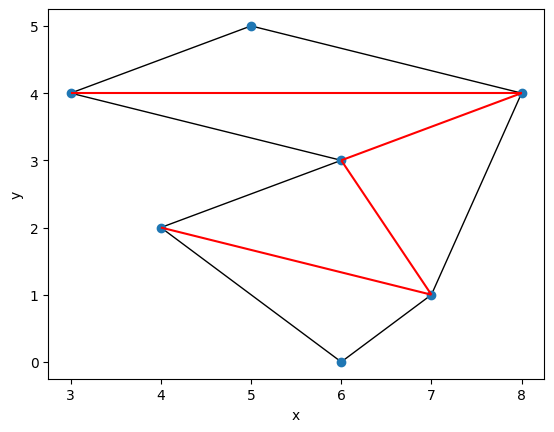

In [123]:
polygon_example_1  =[[5,5], [3,4], [6,3], [4,2], [6,0], [7,1], [8,4]]
tri = triangulation(polygon_example_1)
draw_polygon_tri(polygon_example_1, [(polygon_example_1[x], polygon_example_1[y]) for (x, y) in tri])
print(znajdz_trojkaty(polygon_example_1) == [((3, 4), (6, 3), (8, 4)), ((4, 2), (6, 0), (7, 1)), ((6, 3), (7, 1), (8, 4)), ((3, 4), (5, 5), (8, 4)), ((4, 2), (6, 3), (7, 1))])

Testy poprawności funkcji triangulation.


In [ ]:
Test().runtest(3, triangulation) # passed

Wizualizacja podziału na trójkąty

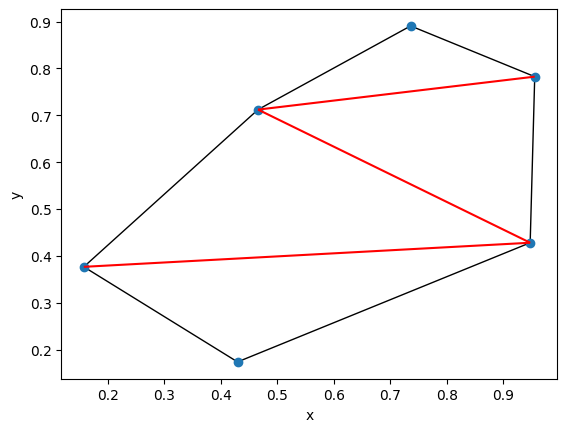

In [93]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Funckja do rysowania gifów triangulacji 

In [ ]:
import time
def triangulation_draw_gif(polygon):
    n=len(polygon)
    minWierzcholek = polygon.index(min(polygon, key = lambda x: x[1])) # najnizszy i najwyzszy wierzcholek
    maxWierzcholek = polygon.index(max(polygon, key = lambda x: x[1]))
    Lewo=[]
    Prawo=[] # wierzcholki po lewej i prawej
    if minWierzcholek < maxWierzcholek: # ustawienie wszystkich lewych/prawych obok siebie
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, minWierzcholek - 1, -1)]
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, n)] + [(polygon[i], i) for i in range(minWierzcholek)]
    else:
        Lewo = [(polygon[i], i) for i in range(maxWierzcholek, minWierzcholek)]
        Prawo = [(polygon[i], i) for i in range(maxWierzcholek - 1, -1, -1)] + [(polygon[i], i) for i in range(n - 1, minWierzcholek - 1, -1)]
        
    ciag_monotoniczny=[None for _ in range(n)] # tworzymy ciag monotoniczny
    l=len(Lewo)
    r=len(Prawo)
    i=j=0
    while i < l or j < r:
        if j >= r or (i < l and Lewo[i][0][1] > Prawo[j][0][1]):
            ciag_monotoniczny[i + j] = (Lewo[i][0], Lewo[i][1], 'lewo')
            i += 1
        else:
            ciag_monotoniczny[i + j] = (Prawo[j][0], Prawo[j][1], 'prawo')
            j += 1

    def correct_triangle(stack_point_one,stack_point_two,current_point,n): # czy trojkat jest dobrze ustawiony
        def orient(a,b,c): # orientacja
            return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]
        if abs(current_point[1]-stack_point_one[1]) in (1,n-1): return False
        if current_point[2]=='prawo':
            return orient(current_point[0],stack_point_two[0],stack_point_one[0])<0
        else:
            return orient(stack_point_one[0],stack_point_two[0],current_point[0])<0

    stack = [ciag_monotoniczny[0], ciag_monotoniczny[1]]

    vis=Visualizer()
    vis.add_point([point[0] for point in ciag_monotoniczny],color="blue")
    vis.add_line_segment([[polygon[i],polygon[(i+1)%n]] for i in range(n)],color="green")
    time.sleep(1)
    vis.add_point([stack[0][0],stack[1][0]],color="yellow")

    for i in range(2, n):
        current = ciag_monotoniczny[i]
        time.sleep(1)
        vis.add_point(current[0],color="magenta")
        if current[2] != stack[-1][2]:
            last_top  = stack[-1]
            while len(stack) > 0:
                top = stack.pop()
                time.sleep(1)
                vis.add_point(top[0],color="magenta")
                if abs(current[1] - top[1]) not in (1, n - 1):
                    time.sleep(1)
                    vis.add_point(top[0],color="red")
                    vis.add_line_segment([polygon[current[1]],polygon[top[1]]],color="red")
                else:
                    time.sleep(1)
                    vis.add_point(top[0],color="blue")
            stack.append(last_top)
            time.sleep(1)
            vis.add_point(last_top[0],color="yellow")
        else:
            while len(stack) > 1:
                top = stack[-1]
                second_top = stack[-2]
                time.sleep(1)
                vis.add_point([top[0],second_top[0]],color="magenta")
                if correct_triangle(second_top, top, current, n):
                    time.sleep(1)
                    vis.add_point(second_top[0],color="red")
                    vis.add_line_segment([polygon[current[1]],polygon[second_top[1]]],color="red")
                    stack.pop()
                    time.sleep(1)
                    vis.add_point(top[0],color="blue")
                else:
                    time.sleep(1)
                    vis.add_point([top[0],second_top[0]],color="yellow")
                    break
        stack.append(current)
    
    return vis

Wielokąty użyte w gifach

In [ ]:
#vis_gif_1 = triangulation_draw_gif(polygon)
#vis_gif_1.save_gif(filename="vis_gif_1")
polygon_1 = [[np.float64(0.42741935483870974), np.float64(0.7554112554112554)], [np.float64(0.29032258064516125), np.float64(0.5254329004329005)], [np.float64(0.3770161290322581), np.float64(0.21428571428571433)], [np.float64(0.780241935483871), np.float64(0.474025974025974)]]
print(polygon_1)

In [ ]:
#vis_gif_2 = triangulation_draw_gif(polygon)
#vis_gif_2.save_gif(filename="vis_gif_2")
polygon_2 = [[np.float64(0.9274193548387096), np.float64(0.05465367965367965)], [np.float64(0.8629032258064516), np.float64(0.9123376623376623)], [np.float64(0.782258064516129), np.float64(0.7851731601731602)], [np.float64(0.6915322580645161), np.float64(0.6634199134199135)], [np.float64(0.592741935483871), np.float64(0.5876623376623377)], [np.float64(0.4959677419354839), np.float64(0.5308441558441559)], [np.float64(0.407258064516129), np.float64(0.4902597402597403)], [np.float64(0.30645161290322576), np.float64(0.4496753246753247)], [np.float64(0.1854838709677419), np.float64(0.41720779220779225)]]
print(polygon_2)

In [ ]:
#vis_gif_3 = triangulation_draw_gif(polygon)
#vis_gif_3.save_gif(filename="vis_gif_3")
polygon_3 = [[np.float64(0.47580645161290325), np.float64(0.9231601731601732)], [np.float64(0.2479838709677419), np.float64(0.7743506493506495)], [np.float64(0.11693548387096772), np.float64(0.6336580086580087)], [np.float64(0.07459677419354838), np.float64(0.47943722943722944)], [np.float64(0.1290322580645161), np.float64(0.29274891774891776)], [np.float64(0.252016129032258), np.float64(0.05465367965367965)], [np.float64(0.407258064516129), np.float64(0.005952380952380959)], [np.float64(0.7076612903225806), np.float64(0.05465367965367965)], [np.float64(0.8608870967741936), np.float64(0.3116883116883117)], [np.float64(0.9818548387096774), np.float64(0.5470779220779222)], [np.float64(0.9697580645161291), np.float64(0.7310606060606061)], [np.float64(0.8447580645161291), np.float64(0.9231601731601732)]]
print(polygon_3)

In [ ]:
#vis_gif_4 = triangulation_draw_gif(polygon)
#vis_gif_4.save_gif(filename="vis_gif_4")
polygon_4 =[[np.float64(0.5120967741935484), np.float64(0.9745670995670997)], [np.float64(0.44758064516129037), np.float64(0.87987012987013)], [np.float64(0.05443548387096775), np.float64(0.8041125541125542)], [np.float64(0.44758064516129037), np.float64(0.7472943722943723)], [np.float64(0.3286290322580645), np.float64(0.676948051948052)], [np.float64(0.4516129032258065), np.float64(0.6363636363636364)], [np.float64(0.04435483870967741), np.float64(0.5227272727272727)], [np.float64(0.44758064516129037), np.float64(0.46590909090909094)], [np.float64(0.27620967741935487), np.float64(0.400974025974026)], [np.float64(0.467741935483871), np.float64(0.34956709956709964)], [np.float64(0.05443548387096775), np.float64(0.26569264069264076)], [np.float64(0.4657258064516129), np.float64(0.24675324675324675)], [np.float64(0.30645161290322576), np.float64(0.20346320346320348)], [np.float64(0.46169354838709675), np.float64(0.170995670995671)], [np.float64(0.46370967741935487), np.float64(0.11417748917748918)], [np.float64(0.5), np.float64(0.06818181818181818)], [np.float64(0.5403225806451613), np.float64(0.011363636363636354)], [np.float64(0.5846774193548387), np.float64(0.05465367965367965)], [np.float64(0.625), np.float64(0.10876623376623376)], [np.float64(0.6209677419354839), np.float64(0.170995670995671)], [np.float64(0.7318548387096774), np.float64(0.20075757575757577)], [np.float64(0.6129032258064516), np.float64(0.2440476190476191)], [np.float64(0.9657258064516129), np.float64(0.3035714285714286)], [np.float64(0.6209677419354839), np.float64(0.3522727272727273)], [np.float64(0.8024193548387096), np.float64(0.39556277056277056)], [np.float64(0.6189516129032259), np.float64(0.45238095238095244)], [np.float64(0.9596774193548386), np.float64(0.5443722943722944)], [np.float64(0.5907258064516129), np.float64(0.6282467532467533)], [np.float64(0.747983870967742), np.float64(0.6715367965367965)], [np.float64(0.592741935483871), np.float64(0.7391774891774893)], [np.float64(0.9798387096774194), np.float64(0.8176406926406927)], [np.float64(0.5846774193548387), np.float64(0.8744588744588745)]]
print(polygon_4)

In [ ]:
#vis_gif_5 = triangulation_draw_gif(polygon)
#vis_gif_5.save_gif(filename="vis_gif_5")
polygon_5 =[[np.float64(0.47580645161290325), np.float64(0.9366883116883117)], [np.float64(0.8024193548387096), np.float64(0.7337662337662338)], [np.float64(0.5846774193548387), np.float64(0.6093073593073594)], [np.float64(0.7721774193548387), np.float64(0.45779220779220786)], [np.float64(0.5423387096774194), np.float64(0.26569264069264076)], [np.float64(0.7600806451612904), np.float64(0.11417748917748918)], [np.float64(0.5080645161290323), np.float64(0.027597402597402593)], [np.float64(0.252016129032258), np.float64(0.08982683982683984)], [np.float64(0.375), np.float64(0.2711038961038962)], [np.float64(0.17137096774193547), np.float64(0.7310606060606061)]]
print(polygon_5)

In [ ]:
polygon_6 =[[np.float64(0.8024193548387096), np.float64(0.5227272727272727)], [np.float64(0.4798387096774194), np.float64(0.8474025974025975)], [np.float64(0.12701612903225803), np.float64(0.9366883116883117)], [np.float64(0.2641129032258065), np.float64(0.7148268398268399)], [np.float64(0.08467741935483872), np.float64(0.6038961038961039)], [np.float64(0.2923387096774194), np.float64(0.48484848484848486)], [np.float64(0.10282258064516128), np.float64(0.35497835497835506)], [np.float64(0.27620967741935487), np.float64(0.2548701298701299)], [np.float64(0.08870967741935484), np.float64(0.1331168831168831)], [np.float64(0.3165322580645161), np.float64(0.12500000000000003)], [np.float64(0.24193548387096772), np.float64(0.0654761904761905)], [np.float64(0.4213709677419355), np.float64(0.04383116883116883)]]
#vis_gif_6 = triangulation_draw_gif(polygon_6)
#vis_gif_6.save_gif(filename="vis_gif_6")
#print(polygon_6)

In [ ]:
#vis_gif_7 = triangulation_draw_gif(polygon)
#vis_gif_7.save_gif(filename="vis_gif_7")
#print(polygon_7)

In [ ]:
#vis_gif_8 = triangulation_draw_gif(polygon)
#vis_gif_8.save_gif(filename="vis_gif_8")
polygon_8 =[[np.float64(0.33669354838709675), np.float64(0.9393939393939396)], [np.float64(0.09274193548387097), np.float64(0.08712121212121213)], [np.float64(0.3104838709677419), np.float64(0.2900432900432901)], [np.float64(0.7721774193548387), np.float64(0.3793290043290043)], [np.float64(0.38104838709677424), np.float64(0.4253246753246753)], [np.float64(0.7943548387096774), np.float64(0.5091991341991342)], [np.float64(0.44556451612903225), np.float64(0.5606060606060607)], [np.float64(0.8084677419354839), np.float64(0.6255411255411256)], [np.float64(0.5161290322580645), np.float64(0.676948051948052)], [np.float64(0.8588709677419354), np.float64(0.7905844155844156)]]
print(polygon_8)

In [ ]:
#vis_gif_9 = triangulation_draw_gif(polygon)
#vis_gif_9.save_gif(filename="vis_gif_9")
polygon_9 = [[np.float64(0.1290322580645161), np.float64(0.8988095238095238)], [np.float64(0.06854838709677419), np.float64(0.7554112554112554)], [np.float64(0.6411290322580645), np.float64(0.6985930735930737)], [np.float64(0.07056451612903225), np.float64(0.4604978354978355)], [np.float64(0.6955645161290323), np.float64(0.3928571428571429)], [np.float64(0.6975806451612904), np.float64(0.3035714285714286)], [np.float64(0.11895161290322578), np.float64(0.23322510822510825)], [np.float64(0.25604838709677413), np.float64(0.13852813852813853)], [np.float64(0.0907258064516129), np.float64(0.06277056277056278)], [np.float64(0.8044354838709677), np.float64(0.06818181818181818)], [np.float64(0.8971774193548386), np.float64(0.2196969696969697)], [np.float64(0.7883064516129032), np.float64(0.46590909090909094)], [np.float64(0.9052419354838709), np.float64(0.7283549783549784)]]
print(polygon_9)

In [ ]:
#vis_gif_10 = triangulation_draw_gif(polygon)
#vis_gif_10.save_gif(filename="vis_gif_10")
polygon_10 = [[np.float64(0.4576612903225806), np.float64(0.9258658008658008)], [np.float64(0.0907258064516129), np.float64(0.48755411255411263)], [np.float64(0.5221774193548387), np.float64(0.6363636363636364)], [np.float64(0.5362903225806451), np.float64(0.28733766233766234)], [np.float64(0.35080645161290325), np.float64(0.12500000000000003)], [np.float64(0.18346774193548385), np.float64(0.22781385281385283)], [np.float64(0.21975806451612903), np.float64(0.033008658008658015)], [np.float64(0.9334677419354839), np.float64(0.05194805194805194)], [np.float64(0.9778225806451614), np.float64(0.5822510822510822)]]
print(polygon)

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.widgets import PolygonSelector

polygon = []

def on_select(verts):
    polygon.clear()
    polygon.extend([list(v) for v in verts])

fig, ax = plt.subplots()
polygon_selector = PolygonSelector(ax, on_select)

plt.show(block=True)


#print(polygon)

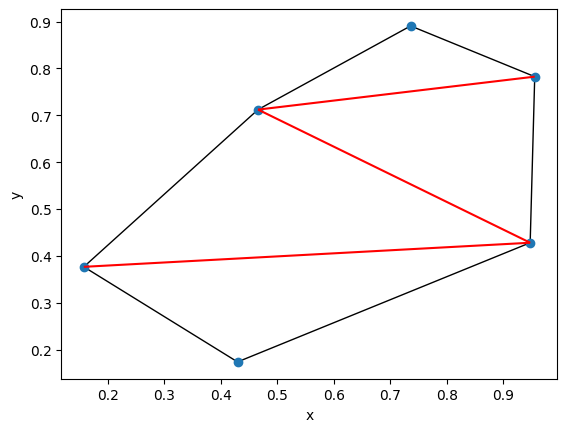

In [94]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Dlaczego usuwanie w pętli w funkcji triangulation jest poprawne dla szczególnego przypadku (odnośnie uwagi do starej wersji kodu funckji traingulation, ocenionej na laboratoriach, juz napisanej od nowa)

Dla bardzo gęstego stężenia punktów np dla 10_000 punktów na okręgu o promieniu 1 (Rys1)funkcji liczenia wyznacznika zwraca niepoprawny wynik, przez co 
funkcja określająca wynik zwraca niepoprawne wartości i triangulacja bez usuwania w pętli daje błędny wynik(rys2), jeśli usuwamy wszystkie w pętli (rys3)
nie otrzymujemy poprawnej całkowitej triangulacji ale przynajmniej nie mamy przecinających się przekątnych

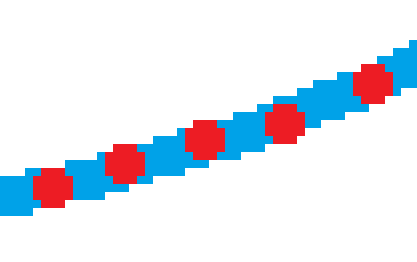 Rys1

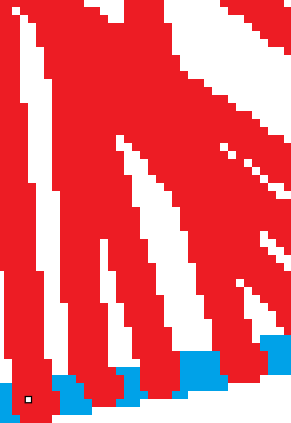 rys2

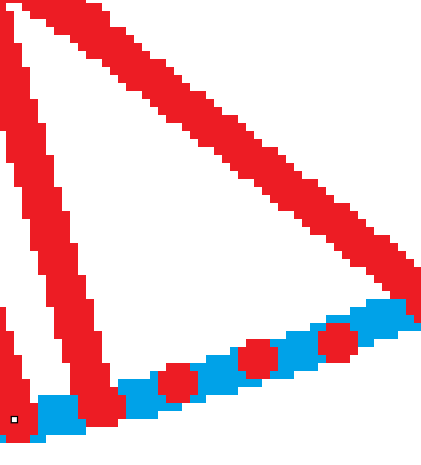 rys3